In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_excel('de_sp_customers_q1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262865 entries, 0 to 262864
Data columns (total 16 columns):
CUSTOMER_ID      262865 non-null int64
TIER             262865 non-null object
ORDERS           262865 non-null int64
SALES            262865 non-null float64
NET_SALES        262865 non-null float64
BASKET_AVG       262865 non-null float64
CM1              262865 non-null float64
CM1_AVG          262865 non-null float64
CM1%             262863 non-null float64
%_NEG_CM1_ORD    262865 non-null float64
LOSS_IN_CM1      262865 non-null float64
CM2              262865 non-null float64
CM2_AVG          262865 non-null float64
CM2%             262863 non-null float64
%_NEG_CM2_ORD    262865 non-null float64
LOSS_IN_CM2      262865 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 32.1+ MB


In [4]:
data.sample(10)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
10765,10395018,[51],4,91.47,85.04,22.87,20.84,5.21,24.51,0.0,0.0,-0.96,-0.24,-1.13,25.0,-2.98
179168,18782540,[56],1,34.89,32.13,34.89,6.54,6.54,20.34,0.0,0.0,2.20,2.20,6.84,0.0,0.00
54972,457272,[53],5,281.63,263.21,56.33,124.45,24.89,47.28,0.0,0.0,91.10,18.22,34.61,0.0,0.00
99745,18442188,[56],2,143.99,132.82,72.00,45.33,22.66,34.13,0.0,0.0,23.63,11.81,17.79,0.0,0.00
25229,2385258,[52],6,314.94,300.76,52.49,67.57,11.26,22.47,0.0,0.0,30.76,5.13,10.23,0.0,0.00
176304,13941997,[202],1,49.03,43.39,49.03,12.69,12.69,29.24,0.0,0.0,4.44,4.44,10.23,0.0,0.00
207787,4014713,[51],1,17.77,16.61,17.77,5.97,5.97,35.93,0.0,0.0,1.60,1.60,9.61,0.0,0.00
125028,4570126,[51],4,142.85,132.71,35.71,27.73,6.93,20.89,0.0,0.0,10.80,2.70,8.14,25.0,-0.28
81463,15945589,[55 52],2,89.46,82.10,44.73,33.22,16.61,40.47,0.0,0.0,24.86,12.43,30.27,0.0,0.00
141786,11601985,[55],2,122.17,114.18,61.08,26.36,13.18,23.08,0.0,0.0,12.27,6.13,10.75,0.0,0.00


In [5]:
data[['ORDERS', 'BASKET_AVG', 'CM2', 'CM2%']].fillna(0).describe().round(2)

,ORDERS,BASKET_AVG,CM2,CM2%
count,262865.00,262865.00,262865.00,2.628650e+05
mean,2.52,68.94,19.72,-1.728698e+13
std,14.26,60.06,33.09,9.721311e+15
min,1.00,-18.93,-1591.85,-3.714739e+18
25%,1.00,38.49,5.35,7.380000e+00
50%,2.00,55.79,13.11,1.310000e+01
75%,3.00,83.65,26.57,1.885000e+01
max,4826.00,8378.99,6685.03,1.271513e+18


In [6]:
data['TIER'].unique()

array(['[52]', '[54]', '[53]', '[201]', '[51]', '[56]', '[204]', '[203]',
       '[55]', '[51 52]', '[ 56 202]', '[51 53]', '[202]', '[53 54]',
       '[55 51]', '[56 51]', '[57]', '[54 53]', '[201 202]', '[56 52]',
       '[55 52]', '[ 54 203]', '[ 52 201]', '[51 54]', '[59]', '[57 52]',
       '[ 52 202]', '[ 57 202]', '[203 204]', '[ 55 201]', '[52 51]',
       '[54 52]', '[ 54 204]', '[201  51]', '[ 56 201]', '[154]',
       '[56 54]', '[51 52 53]', '[52 54]', '[57 51]', '[153]', '[56 53]',
       '[ 55 202]', '[52 53]', '[56 52 54]', '[ 51 202]', '[55 54]',
       '[ 51 201]', '[204  54]', '[51 55]', '[51 56]', '[57 54]',
       '[201  52]', '[152]', '[203  53]', '[203  51]', '[52 57]',
       '[ 53 155]', '[201  54]', '[ 53 203]', '[59 53]', '[201  53]',
       '[151]', '[202 201]', '[203  54]', '[202  56]', '[202  52]', '[8]',
       '[59 54]', '[155]', '[156]'], dtype=object)

In [7]:
selected_tiers = list(data['TIER'].value_counts().index.values[:10])
selected_tiers

['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[56]',
 '[55]',
 '[201]',
 '[202]',
 '[203]',
 '[204]']

In [8]:
data = data[data['TIER'].isin(selected_tiers)]

In [9]:
tiers = [51, 52, 53, 54, 55, 56, 201, 202, 203, 204]

In [10]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [11]:
data['TIER'] = data['TIER'].map(get_number_from_string)

In [12]:
data.head()

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,15203435,52,5,411.84,369.06,82.37,113.24,22.65,30.68,0.0,0.0,57.60,11.52,15.61,0.0,0.0
1,3177149,54,2,157.62,142.72,78.81,51.97,25.98,36.41,0.0,0.0,25.50,12.75,17.86,0.0,0.0
2,11981019,53,4,297.85,261.63,74.46,54.27,13.57,20.74,0.0,0.0,24.00,6.00,9.17,0.0,0.0
3,7352563,54,3,563.52,519.57,187.84,116.08,38.69,22.34,0.0,0.0,38.20,12.73,7.35,0.0,0.0
4,5430768,54,5,355.85,325.91,71.17,89.46,17.89,27.45,0.0,0.0,50.52,10.10,15.50,0.0,0.0


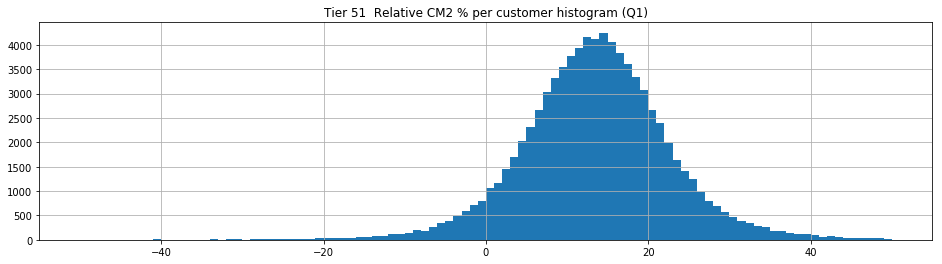

,CM2%
count,8.292200e+04
mean,-3.557921e+13
std,1.024545e+16
min,-2.950299e+18
25%,8.070000e+00
50%,1.354000e+01
75%,1.893000e+01
max,6.728710e+07


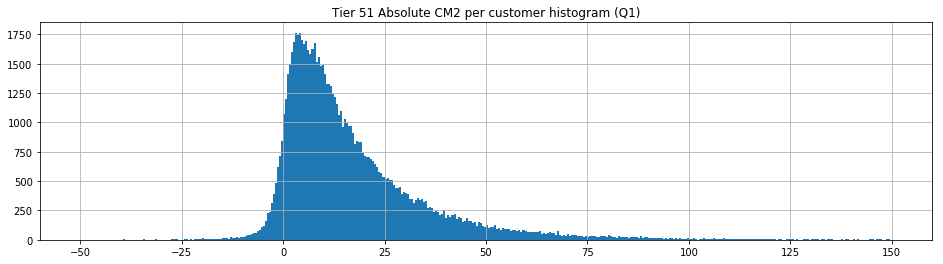

,CM2
count,82922.000000
mean,17.499981
std,21.441911
min,-186.420000
25%,5.070000
50%,11.870000
75%,23.490000
max,1497.190000


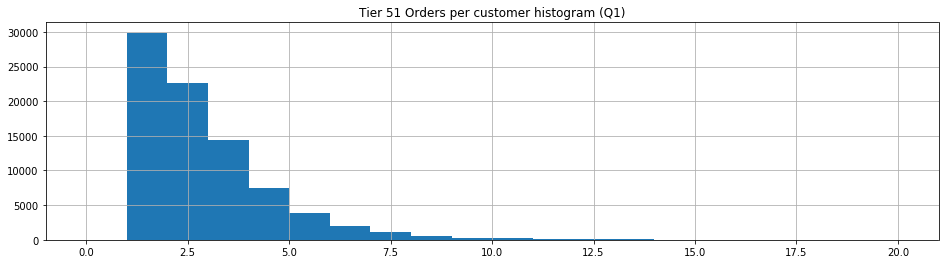

,ORDERS
count,82922.000000
mean,2.443887
std,1.792438
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,60.000000


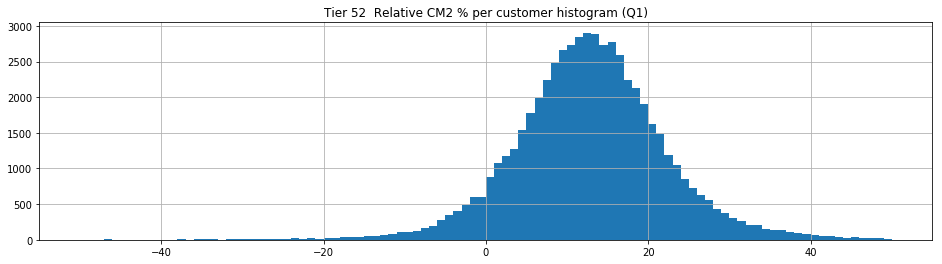

,CM2%
count,5.796100e+04
mean,2.193738e+13
std,5.281444e+15
min,-7.999430e+03
25%,7.290000e+00
50%,1.276000e+01
75%,1.825000e+01
max,1.271513e+18


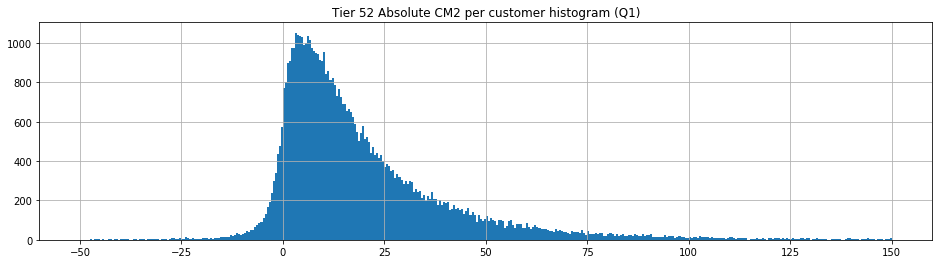

,CM2
count,57962.000000
mean,20.211574
std,26.576240
min,-622.980000
25%,5.442500
50%,13.400000
75%,27.120000
max,1313.840000


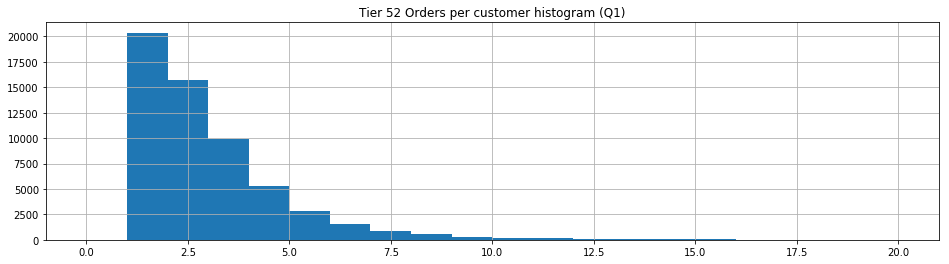

,ORDERS
count,57962.000000
mean,2.553345
std,2.189617
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,203.000000


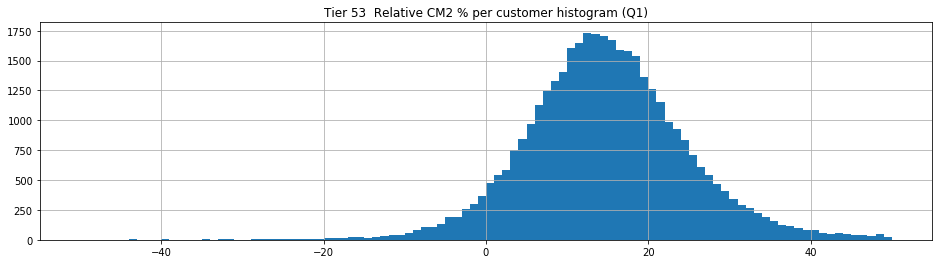

,CM2%
count,37961.000000
mean,14.536531
std,16.784348
min,-1475.080000
25%,8.590000
50%,14.470000
75%,20.670000
max,69.720000


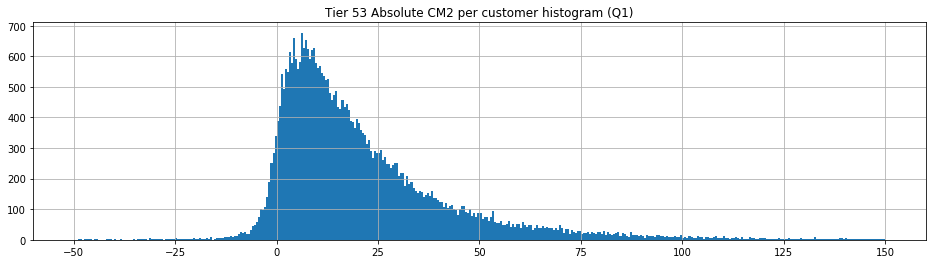

,CM2
count,37961.000000
mean,21.901707
std,27.805881
min,-362.980000
25%,6.550000
50%,15.100000
75%,29.270000
max,1964.530000


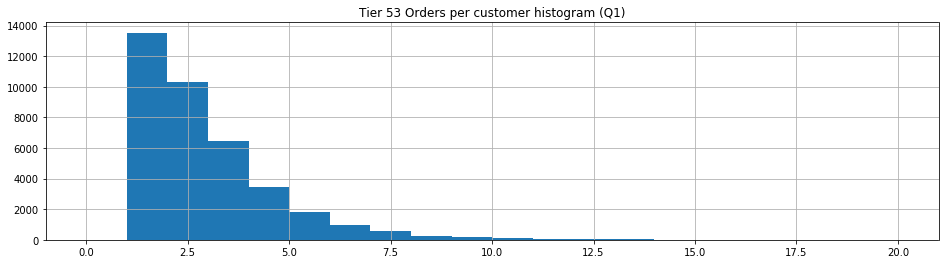

,ORDERS
count,37961.000000
mean,2.484049
std,1.857918
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,36.000000


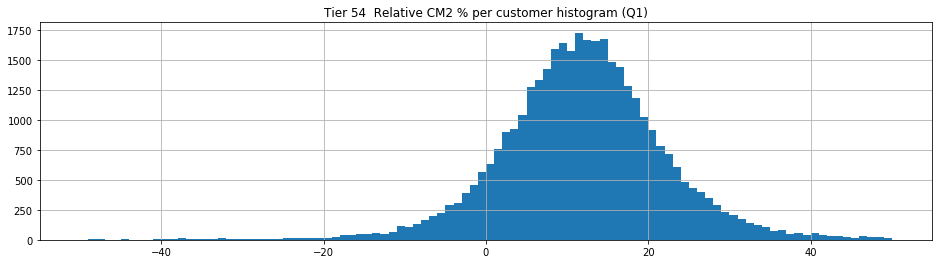

,CM2%
count,3.653300e+04
mean,2.324978e+13
std,4.443872e+15
min,-4.494950e+07
25%,5.960000e+00
50%,1.185000e+01
75%,1.776000e+01
max,8.493843e+17


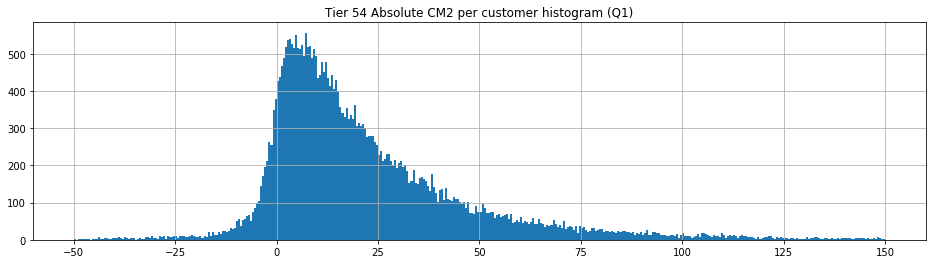

,CM2
count,36534.000000
mean,22.775987
std,38.342234
min,-1591.850000
25%,5.470000
50%,15.070000
75%,31.730000
max,2702.350000


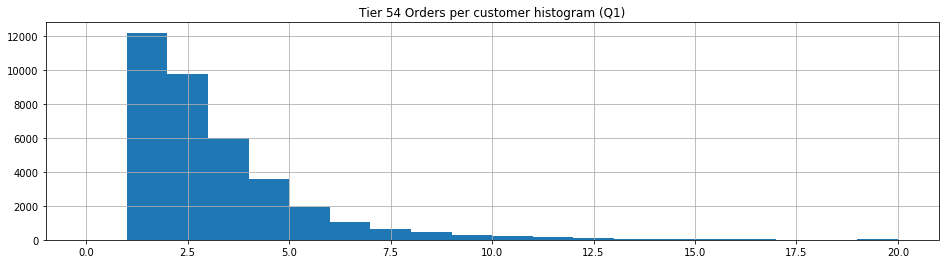

,ORDERS
count,36534.000000
mean,2.821153
std,16.256159
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3069.000000


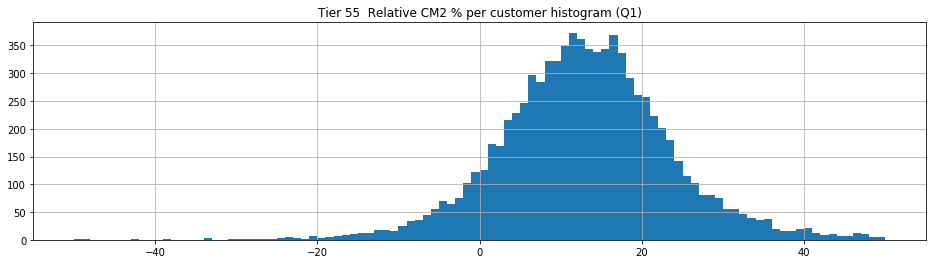

,CM2%
count,8446.000000
mean,12.734335
std,14.242101
min,-506.380000
25%,6.560000
50%,12.900000
75%,19.187500
max,63.730000


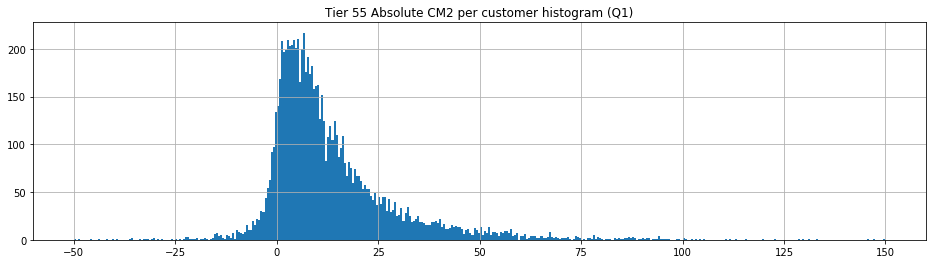

,CM2
count,8446.000000
mean,13.339337
std,17.049698
min,-117.880000
25%,3.490000
50%,8.930000
75%,18.220000
max,272.830000


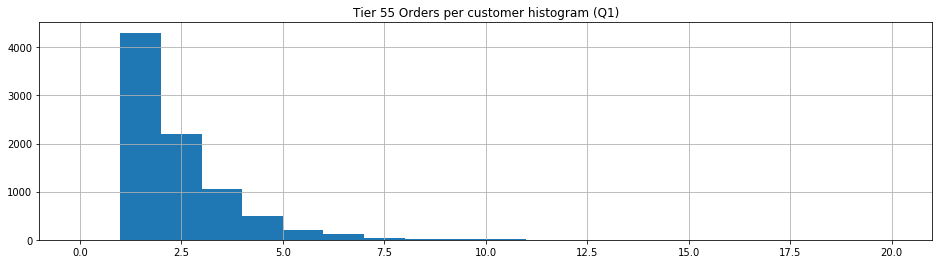

,ORDERS
count,8446.000000
mean,1.920436
std,1.305748
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16.000000


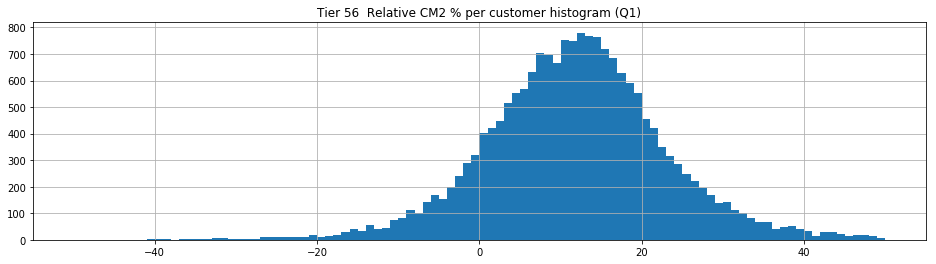

,CM2%
count,1.872000e+04
mean,-1.984369e+14
std,2.715035e+16
min,-3.714739e+18
25%,4.990000e+00
50%,1.187000e+01
75%,1.841000e+01
max,7.046000e+01


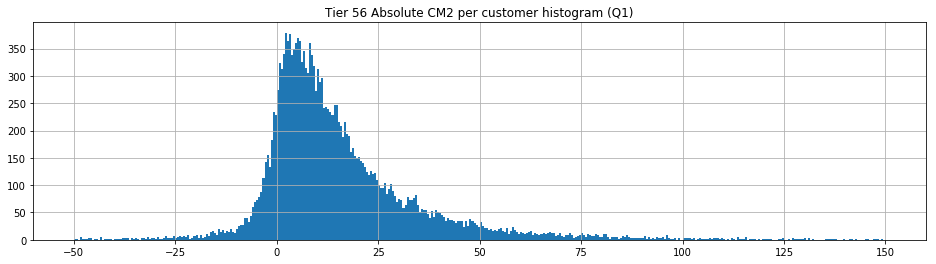

,CM2
count,18720.000000
mean,16.212941
std,74.904320
min,-1419.770000
25%,3.467500
50%,10.470000
75%,21.950000
max,6685.030000


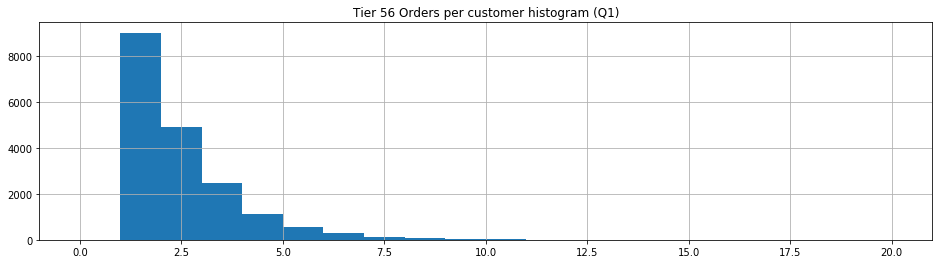

,ORDERS
count,18720.000000
mean,2.554861
std,47.572900
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4826.000000


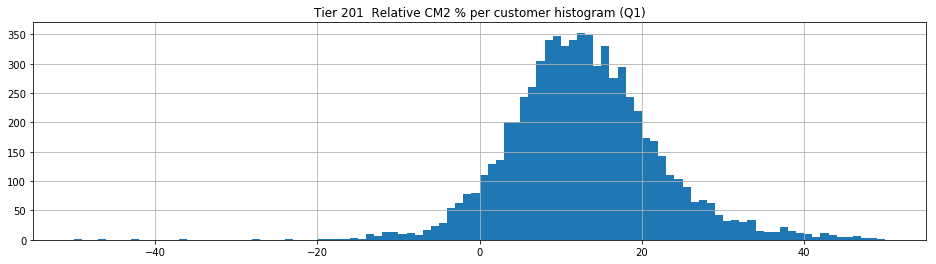

,CM2%
count,7.067000e+03
mean,-1.073553e+04
std,9.035521e+05
min,-7.595750e+07
25%,7.120000e+00
50%,1.237000e+01
75%,1.803000e+01
max,6.158000e+01


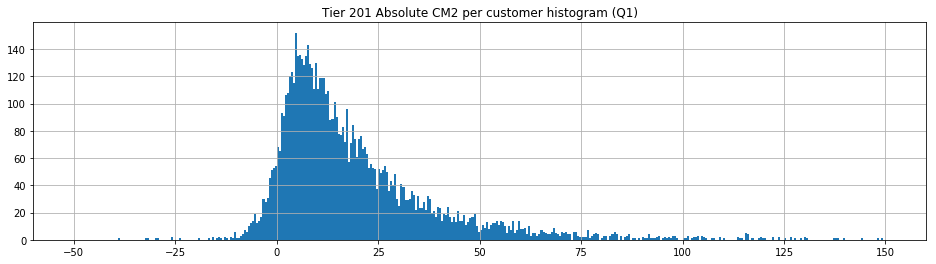

,CM2
count,7067.000000
mean,19.467628
std,22.329830
min,-128.380000
25%,6.040000
50%,13.290000
75%,26.065000
max,290.620000


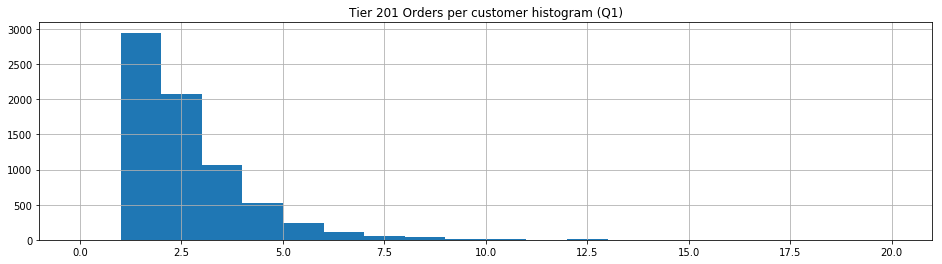

,ORDERS
count,7067.000000
mean,2.147163
std,1.439257
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


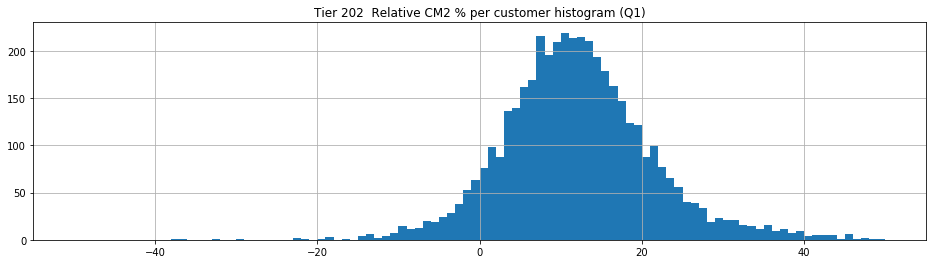

,CM2%
count,4302.000000
mean,10.871997
std,42.446901
min,-1692.800000
25%,6.312500
50%,11.595000
75%,17.207500
max,53.920000


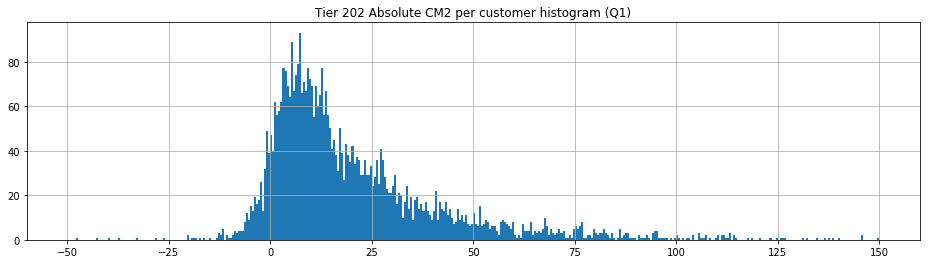

,CM2
count,4302.000000
mean,20.766957
std,25.402116
min,-293.230000
25%,5.912500
50%,13.585000
75%,28.017500
max,250.310000


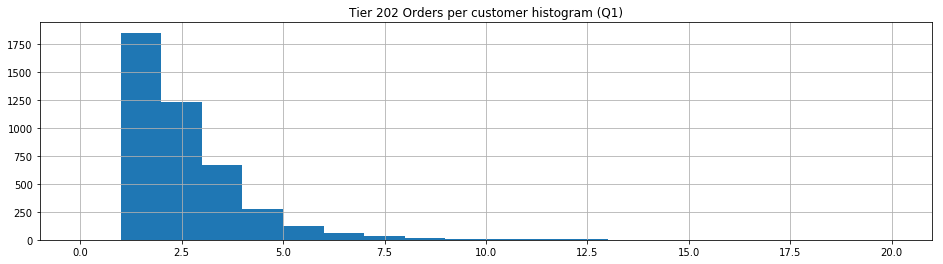

,ORDERS
count,4302.000000
mean,2.139470
std,1.536075
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,18.000000


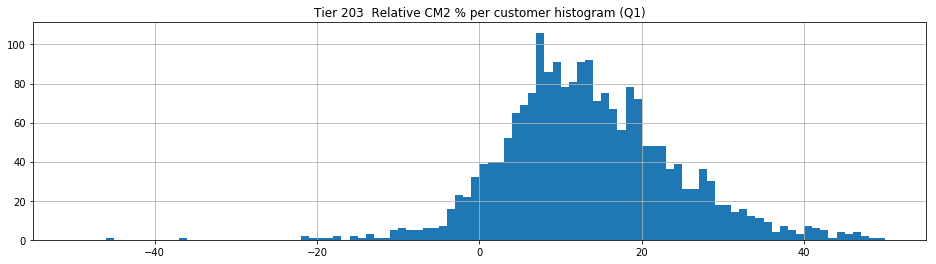

,CM2%
count,2073.000000
mean,13.540309
std,11.383743
min,-123.700000
25%,6.760000
50%,12.680000
75%,19.720000
max,58.100000


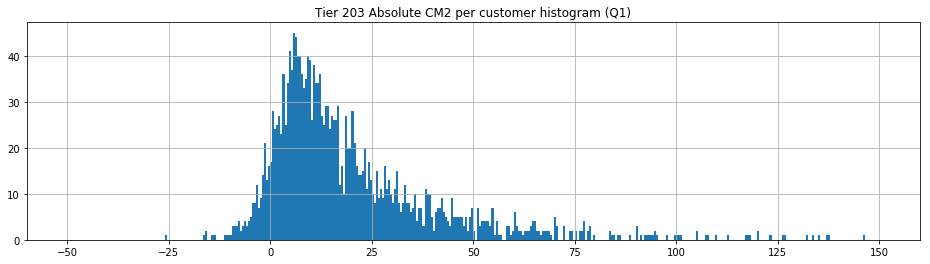

,CM2
count,2073.000000
mean,20.928895
std,27.471996
min,-25.650000
25%,6.060000
50%,13.440000
75%,27.320000
max,472.440000


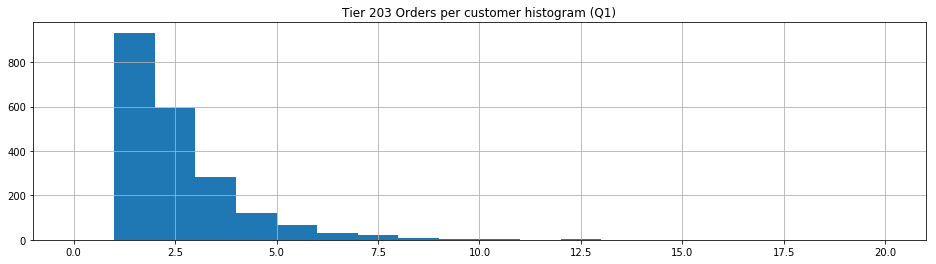

,ORDERS
count,2073.000000
mean,2.091172
std,1.513416
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,18.000000


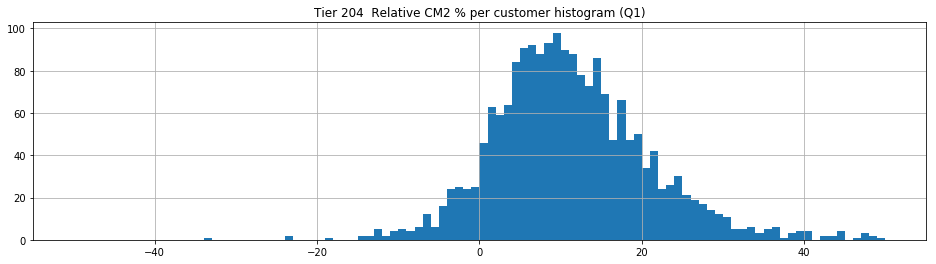

,CM2%
count,1947.000000
mean,11.084376
std,10.419153
min,-132.370000
25%,5.015000
50%,10.350000
75%,16.680000
max,49.710000


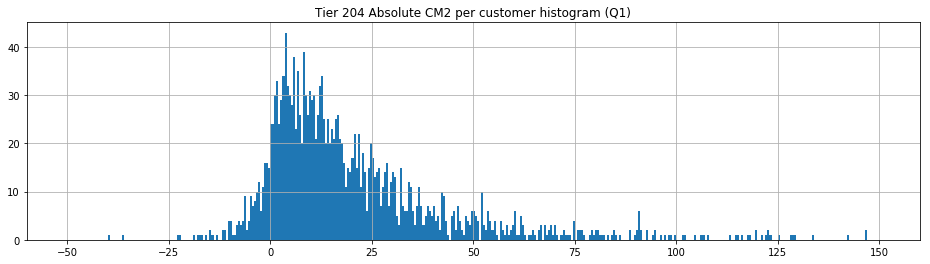

,CM2
count,1947.000000
mean,21.387350
std,28.470324
min,-57.210000
25%,5.315000
50%,13.780000
75%,28.060000
max,400.710000


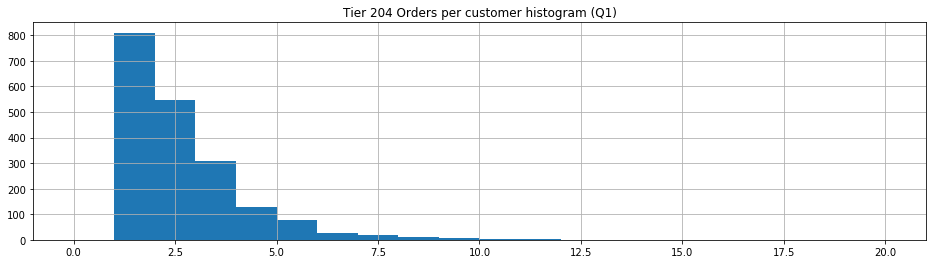

,ORDERS
count,1947.000000
mean,2.230611
std,1.691441
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


In [13]:
for tq in tiers:
    data_tier = data[data['TIER'] == tq]
    
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].describe()))
        
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 20))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))

In [14]:
data_simulation = data.copy()

In [15]:
data_simulation['ORDERS'] = data_simulation['ORDERS'] * 3
data_simulation['CM2'] = data_simulation['CM2'] * 3

In [16]:
sim = data_simulation[['CUSTOMER_ID', 'TIER', 'ORDERS', 'CM2', 'CM2%']]

...........................................................TIER  51 ..........................................................


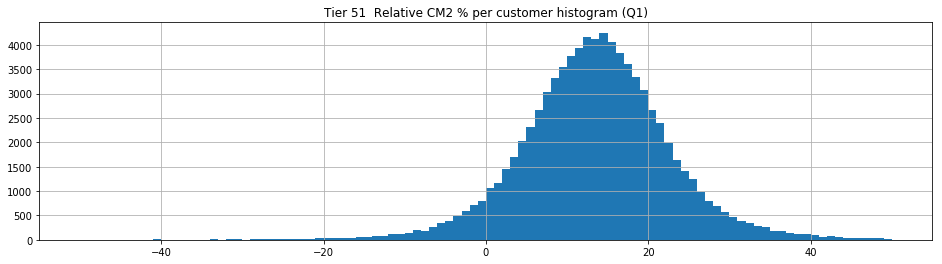

,CM2%
count,8.292200e+04
mean,-3.557921e+13
std,1.024545e+16
min,-2.950299e+18
25%,8.070000e+00
50%,1.354000e+01
75%,1.893000e+01
max,6.728710e+07


CM2% threshold >= 5  is the percentile 15.05
CM2% threshold >= 7  is the percentile 21.06
CM2% threshold >=  9.3  is the percentile 30 allowing us to stay with the 70% of our sample


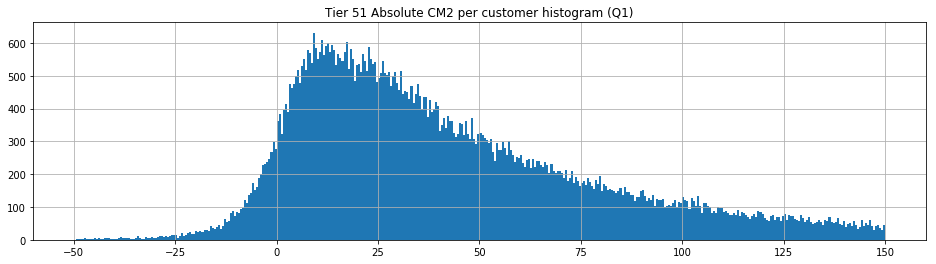

,CM2
count,82922.000000
mean,52.499942
std,64.325732
min,-559.260000
25%,15.210000
50%,35.610000
75%,70.470000
max,4491.570000


18.9  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  18.9  we keep eligible a  69.28  % from our customers
With CM2% threshold >= 7 and CM2 >=  18.9  we keep eligible a  67.07  % from our customers
With CM2% threshold >=  9.3  and CM2 >=  18.9  we keep eligible a  61.83  % from our customers


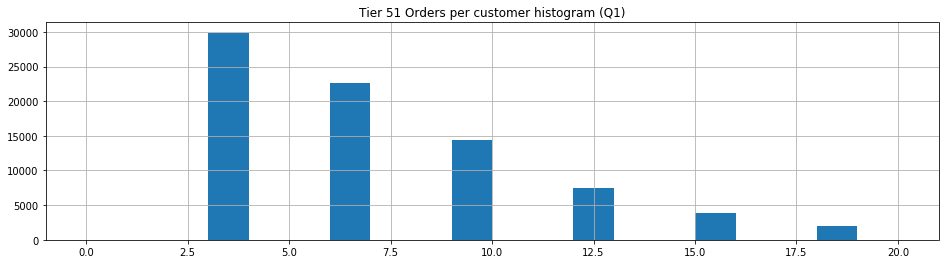

,ORDERS
count,82922.000000
mean,7.331661
std,5.377314
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,180.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  84.95  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  78.94  % from our customers
With CM2% threshold >=  9.3  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


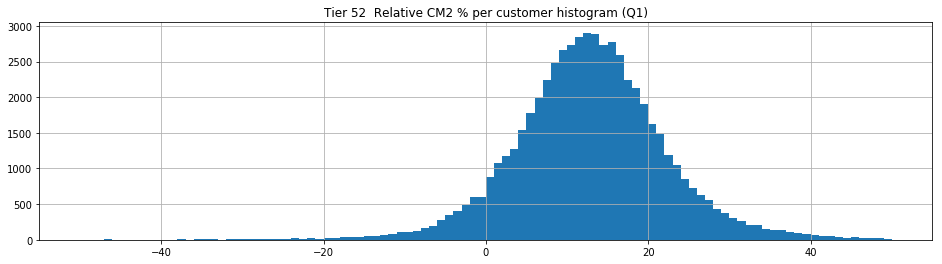

,CM2%
count,5.796200e+04
mean,2.193700e+13
std,5.281399e+15
min,-7.999430e+03
25%,7.290000e+00
50%,1.276000e+01
75%,1.825000e+01
max,1.271513e+18


C:\Users\albertoma\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1796: RuntimeWarning: invalid value encountered in less
  return np.sum(a < score) / float(n) * 100


CM2% threshold >= 5  is the percentile 17.35
CM2% threshold >= 7  is the percentile 23.84
CM2% threshold >=  8.56  is the percentile 30 allowing us to stay with the 70% of our sample


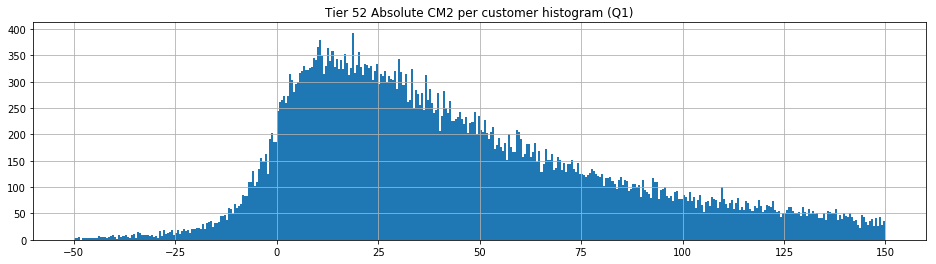

,CM2
count,57962.000000
mean,60.634723
std,79.728719
min,-1868.940000
25%,16.327500
50%,40.200000
75%,81.360000
max,3941.520000


20.61  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  20.61  we keep eligible a  68.81  % from our customers
With CM2% threshold >= 7 and CM2 >=  20.61  we keep eligible a  65.88  % from our customers
With CM2% threshold >=  8.56  and CM2 >=  20.61  we keep eligible a  62.23  % from our customers


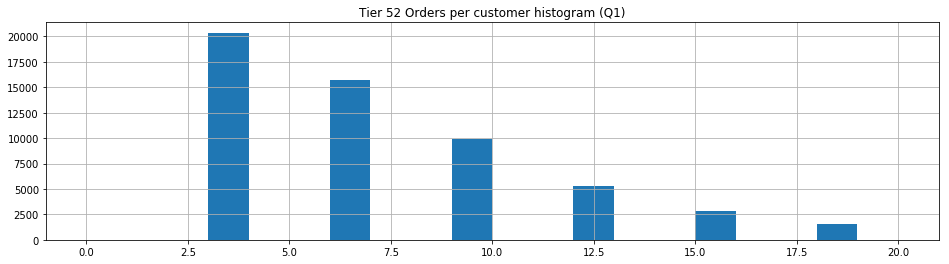

,ORDERS
count,57962.000000
mean,7.660036
std,6.568851
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,609.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  82.65  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  76.16  % from our customers
With CM2% threshold >=  8.56  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


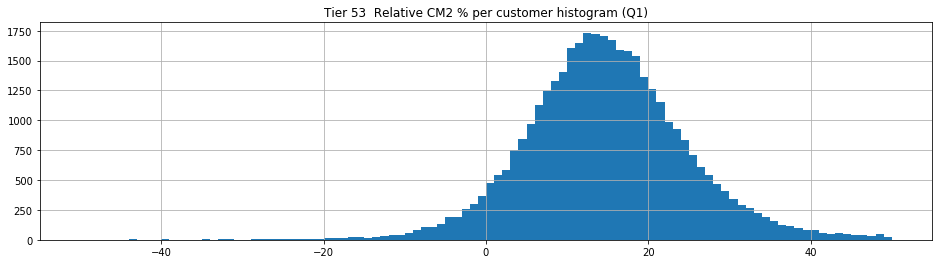

,CM2%
count,37961.000000
mean,14.536531
std,16.784348
min,-1475.080000
25%,8.590000
50%,14.470000
75%,20.670000
max,69.720000


CM2% threshold >= 5  is the percentile 14.18
CM2% threshold >= 7  is the percentile 19.7
CM2% threshold >=  9.94  is the percentile 30 allowing us to stay with the 70% of our sample


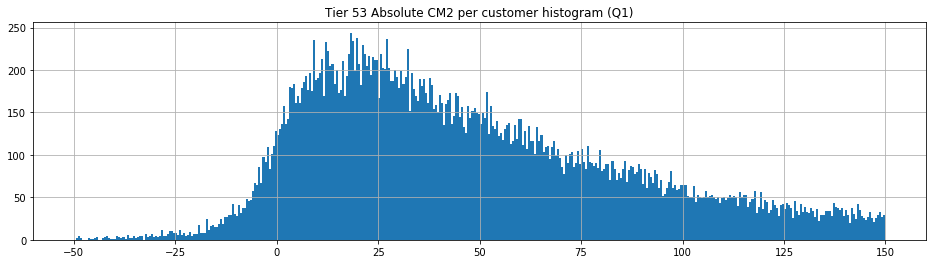

,CM2
count,37961.000000
mean,65.705121
std,83.417642
min,-1088.940000
25%,19.650000
50%,45.300000
75%,87.810000
max,5893.590000


24.18  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  24.18  we keep eligible a  69.19  % from our customers
With CM2% threshold >= 7 and CM2 >=  24.18  we keep eligible a  67.32  % from our customers
With CM2% threshold >=  9.94  and CM2 >=  24.18  we keep eligible a  61.59  % from our customers


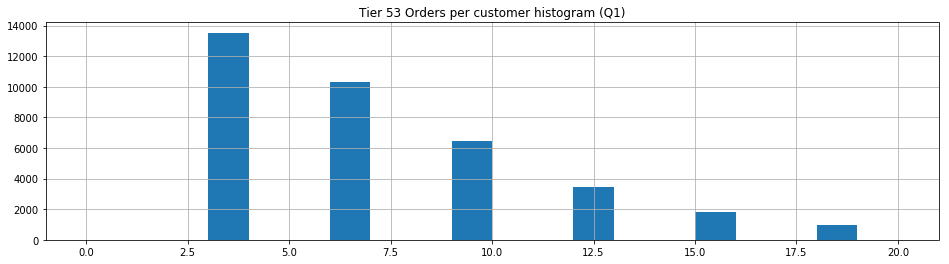

,ORDERS
count,37961.000000
mean,7.452148
std,5.573754
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,108.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  85.82  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  80.3  % from our customers
With CM2% threshold >=  9.94  and Orders >=  3.0  we keep eligible a  70.04  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


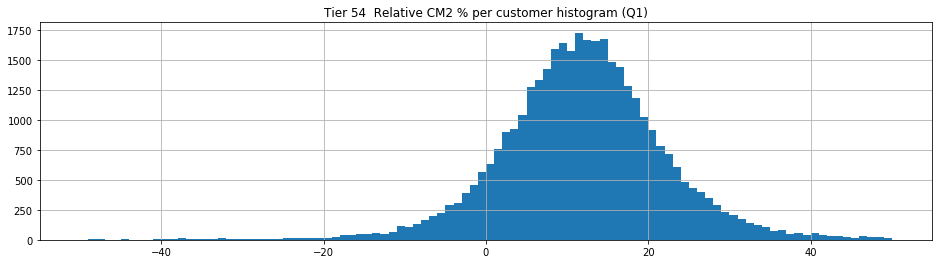

,CM2%
count,3.653400e+04
mean,2.324915e+13
std,4.443811e+15
min,-4.494950e+07
25%,5.960000e+00
50%,1.185000e+01
75%,1.776000e+01
max,8.493843e+17


CM2% threshold >= 5  is the percentile 21.62
CM2% threshold >= 7  is the percentile 28.79
CM2% threshold >=  7.32  is the percentile 30 allowing us to stay with the 70% of our sample


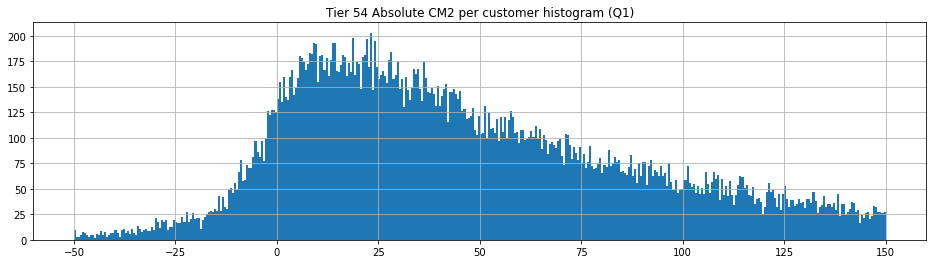

,CM2
count,36534.000000
mean,68.327961
std,115.026702
min,-4775.550000
25%,16.410000
50%,45.210000
75%,95.190000
max,8107.050000


21.716999999999988  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  21.716999999999988  we keep eligible a  67.76  % from our customers
With CM2% threshold >= 7 and CM2 >=  21.716999999999988  we keep eligible a  63.92  % from our customers
With CM2% threshold >=  7.32  and CM2 >=  21.716999999999988  we keep eligible a  63.09  % from our customers


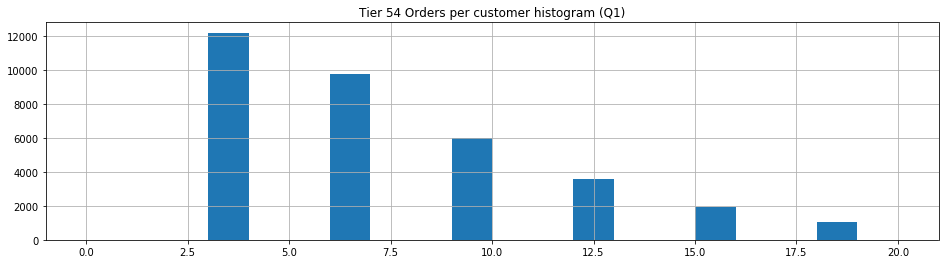

,ORDERS
count,36534.000000
mean,8.463459
std,48.768477
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,9207.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  78.38  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  71.2  % from our customers
With CM2% threshold >=  7.32  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


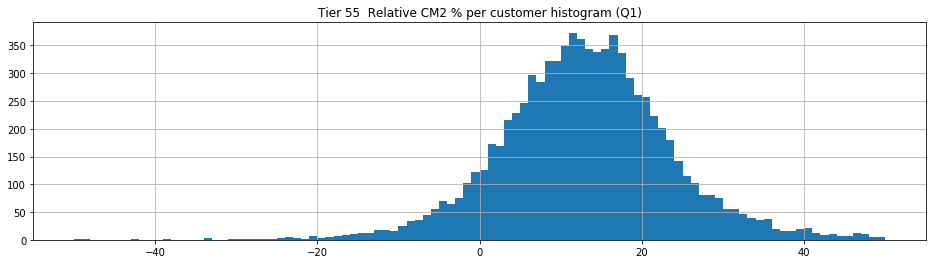

,CM2%
count,8446.000000
mean,12.734335
std,14.242101
min,-506.380000
25%,6.560000
50%,12.900000
75%,19.187500
max,63.730000


CM2% threshold >= 5  is the percentile 20.14
CM2% threshold >= 7  is the percentile 26.57
CM2% threshold >=  8.015  is the percentile 30 allowing us to stay with the 70% of our sample


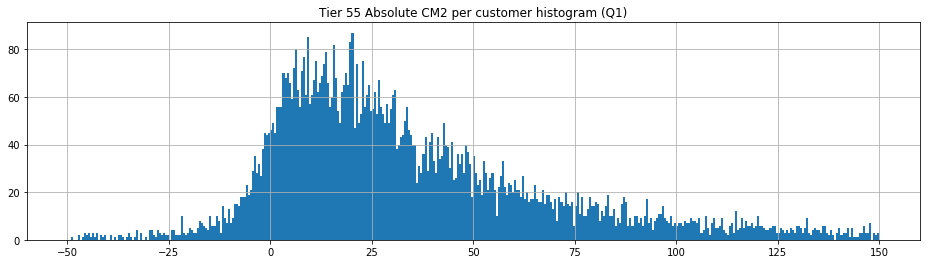

,CM2
count,8446.000000
mean,40.018011
std,51.149095
min,-353.640000
25%,10.470000
50%,26.790000
75%,54.660000
max,818.490000


13.559999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  13.559999999999999  we keep eligible a  68.35  % from our customers
With CM2% threshold >= 7 and CM2 >=  13.559999999999999  we keep eligible a  65.33  % from our customers
With CM2% threshold >=  8.015  and CM2 >=  13.559999999999999  we keep eligible a  63.26  % from our customers


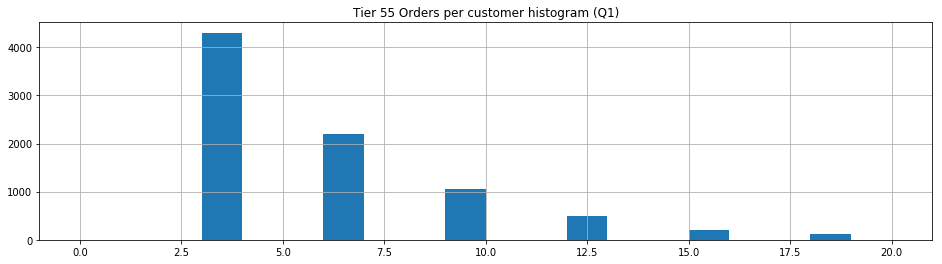

,ORDERS
count,8446.000000
mean,5.761307
std,3.917243
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,48.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  79.86  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  73.43  % from our customers
With CM2% threshold >=  8.015  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


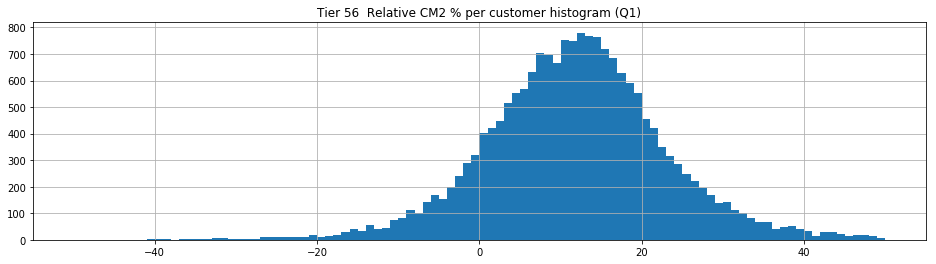

,CM2%
count,1.872000e+04
mean,-1.984369e+14
std,2.715035e+16
min,-3.714739e+18
25%,4.990000e+00
50%,1.187000e+01
75%,1.841000e+01
max,7.046000e+01


CM2% threshold >= 5  is the percentile 25.01
CM2% threshold >= 7  is the percentile 31.42
CM2% threshold >=  6.57  is the percentile 30 allowing us to stay with the 70% of our sample


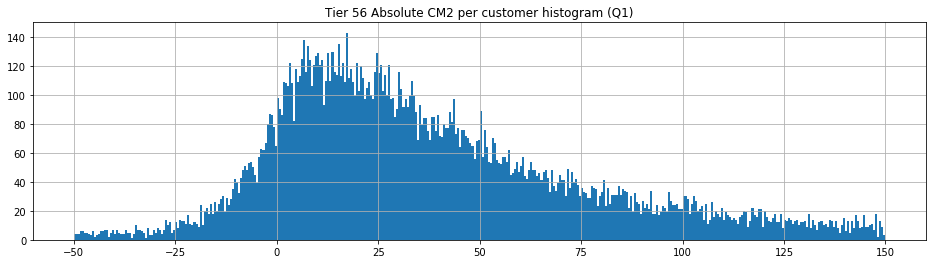

,CM2
count,18720.000000
mean,48.638822
std,224.712959
min,-4259.310000
25%,10.402500
50%,31.410000
75%,65.850000
max,20055.090000


14.399999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  14.399999999999999  we keep eligible a  67.29  % from our customers
With CM2% threshold >= 7 and CM2 >=  14.399999999999999  we keep eligible a  63.4  % from our customers
With CM2% threshold >=  6.57  and CM2 >=  14.399999999999999  we keep eligible a  64.38  % from our customers


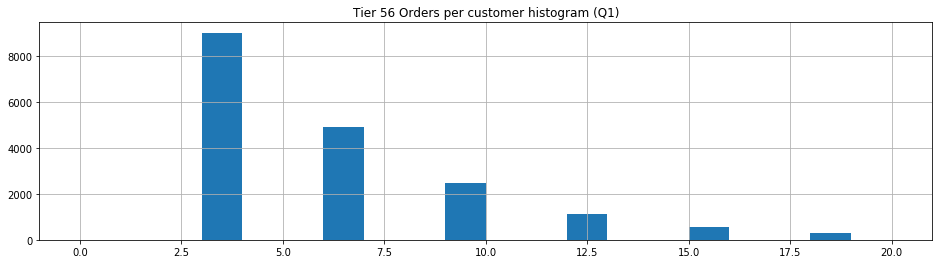

,ORDERS
count,18720.000000
mean,7.664583
std,142.718700
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,14478.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  74.99  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  68.58  % from our customers
With CM2% threshold >=  6.57  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  201 ..........................................................


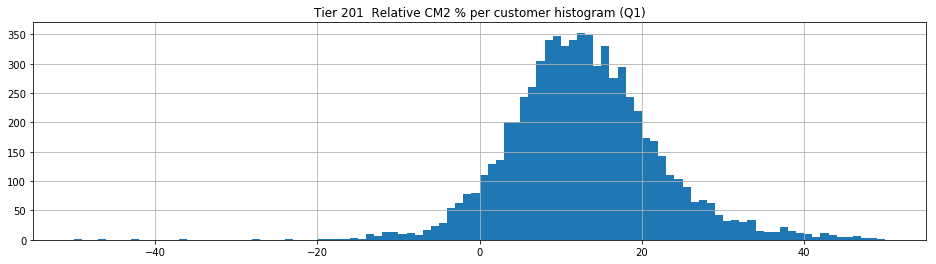

,CM2%
count,7.067000e+03
mean,-1.073553e+04
std,9.035521e+05
min,-7.595750e+07
25%,7.120000e+00
50%,1.237000e+01
75%,1.803000e+01
max,6.158000e+01


CM2% threshold >= 5  is the percentile 17.31
CM2% threshold >= 7  is the percentile 24.45
CM2% threshold >=  8.26  is the percentile 30 allowing us to stay with the 70% of our sample


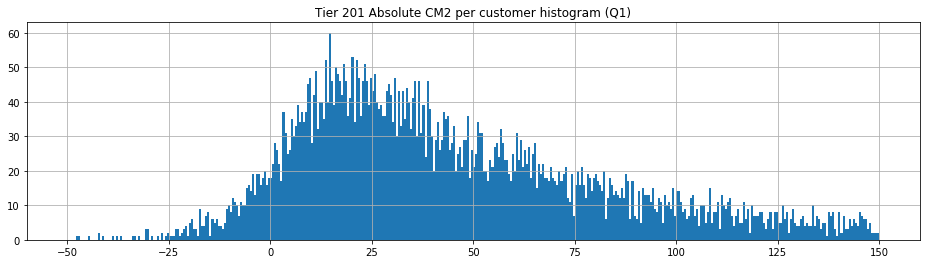

,CM2
count,7067.000000
mean,58.402885
std,66.989489
min,-385.140000
25%,18.120000
50%,39.870000
75%,78.195000
max,871.860000


22.080000000000002  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  22.080000000000002  we keep eligible a  68.71  % from our customers
With CM2% threshold >= 7 and CM2 >=  22.080000000000002  we keep eligible a  65.33  % from our customers
With CM2% threshold >=  8.26  and CM2 >=  22.080000000000002  we keep eligible a  61.62  % from our customers


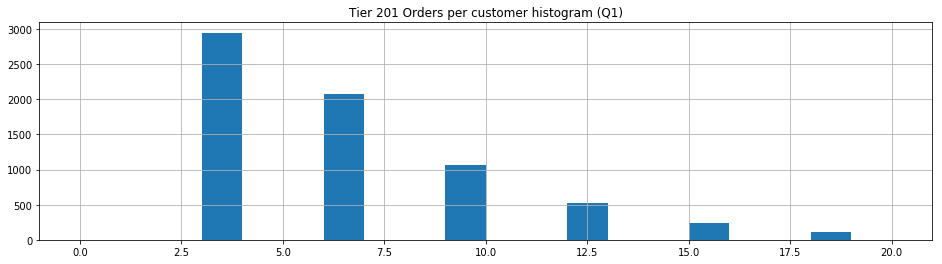

,ORDERS
count,7067.000000
mean,6.441489
std,4.317772
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,45.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  82.69  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  75.55  % from our customers
With CM2% threshold >=  8.26  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  202 ..........................................................


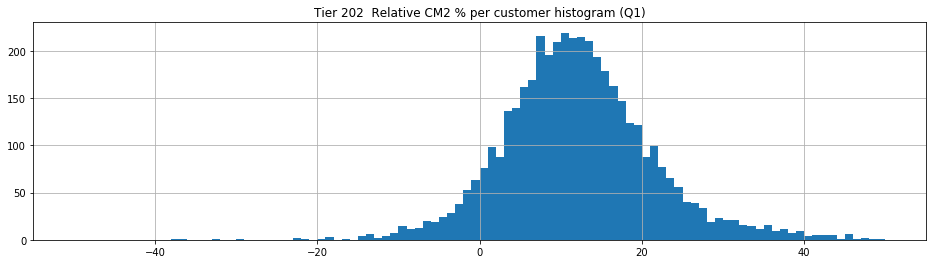

,CM2%
count,4302.000000
mean,10.871997
std,42.446901
min,-1692.800000
25%,6.312500
50%,11.595000
75%,17.207500
max,53.920000


CM2% threshold >= 5  is the percentile 20.01
CM2% threshold >= 7  is the percentile 27.71
CM2% threshold >=  7.503  is the percentile 30 allowing us to stay with the 70% of our sample


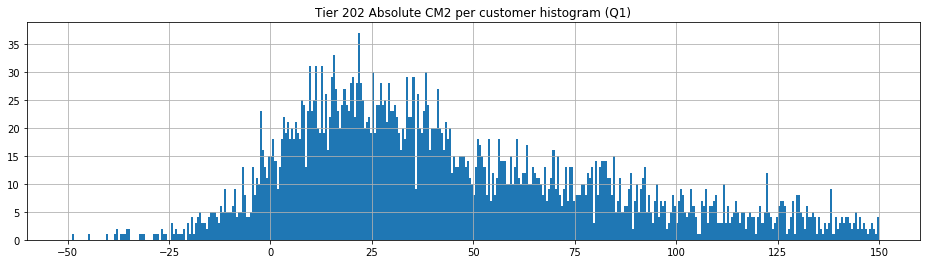

,CM2
count,4302.000000
mean,62.300872
std,76.206347
min,-879.690000
25%,17.737500
50%,40.755000
75%,84.052500
max,750.930000


21.75  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  21.75  we keep eligible a  67.92  % from our customers
With CM2% threshold >= 7 and CM2 >=  21.75  we keep eligible a  64.02  % from our customers
With CM2% threshold >=  7.503  and CM2 >=  21.75  we keep eligible a  62.46  % from our customers


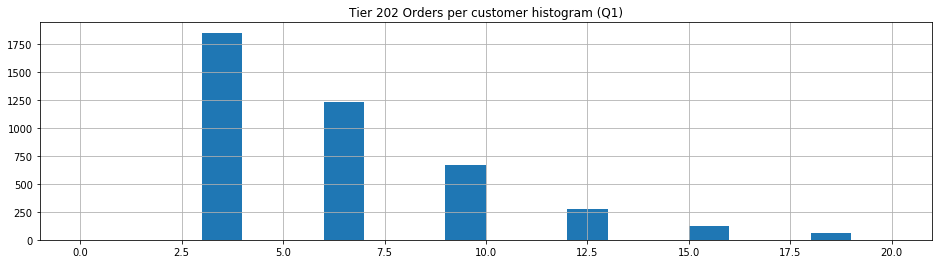

,ORDERS
count,4302.000000
mean,6.418410
std,4.608224
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,54.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  79.99  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  72.29  % from our customers
With CM2% threshold >=  7.503  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  203 ..........................................................


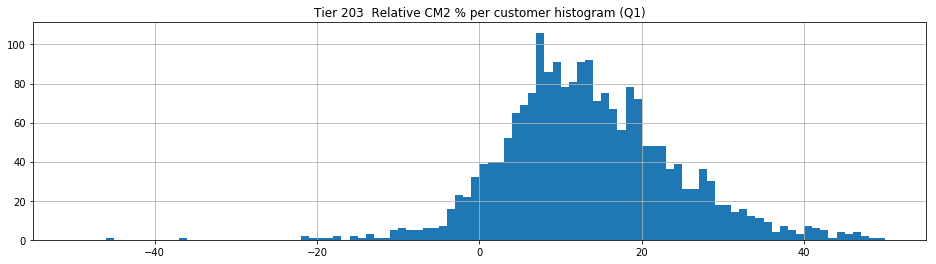

,CM2%
count,2073.000000
mean,13.540309
std,11.383743
min,-123.700000
25%,6.760000
50%,12.680000
75%,19.720000
max,58.100000


CM2% threshold >= 5  is the percentile 18.72
CM2% threshold >= 7  is the percentile 25.66
CM2% threshold >=  7.85  is the percentile 30 allowing us to stay with the 70% of our sample


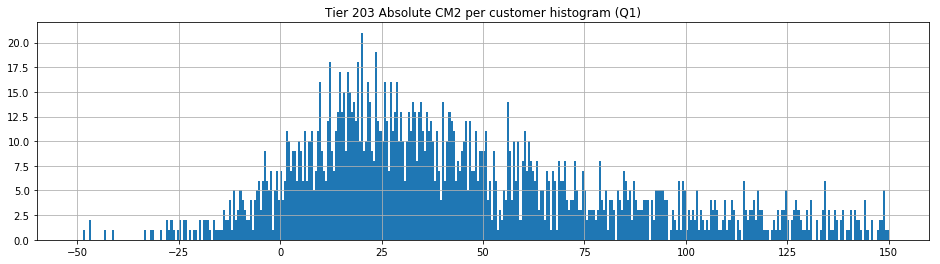

,CM2
count,2073.000000
mean,62.786686
std,82.415987
min,-76.950000
25%,18.180000
50%,40.320000
75%,81.960000
max,1417.320000


21.93  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  21.93  we keep eligible a  68.6  % from our customers
With CM2% threshold >= 7 and CM2 >=  21.93  we keep eligible a  64.88  % from our customers
With CM2% threshold >=  7.85  and CM2 >=  21.93  we keep eligible a  62.13  % from our customers


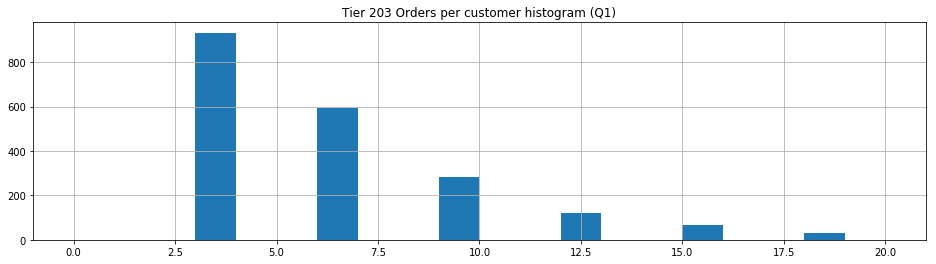

,ORDERS
count,2073.000000
mean,6.273517
std,4.540249
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,54.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  81.28  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  74.34  % from our customers
With CM2% threshold >=  7.85  and Orders >=  3.0  we keep eligible a  70.04  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  204 ..........................................................


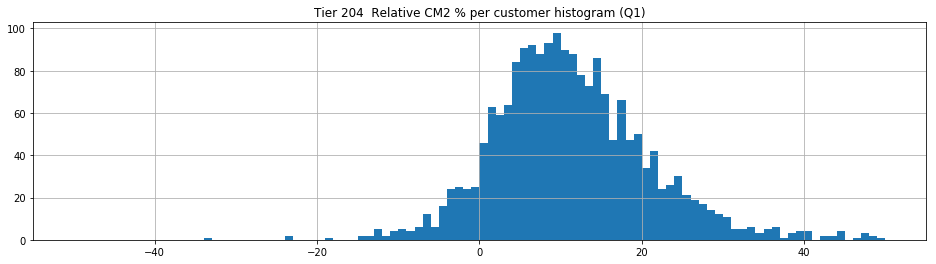

,CM2%
count,1947.000000
mean,11.084376
std,10.419153
min,-132.370000
25%,5.015000
50%,10.350000
75%,16.680000
max,49.710000


CM2% threshold >= 5  is the percentile 24.86
CM2% threshold >= 7  is the percentile 34.26
CM2% threshold >=  6.07  is the percentile 30 allowing us to stay with the 70% of our sample


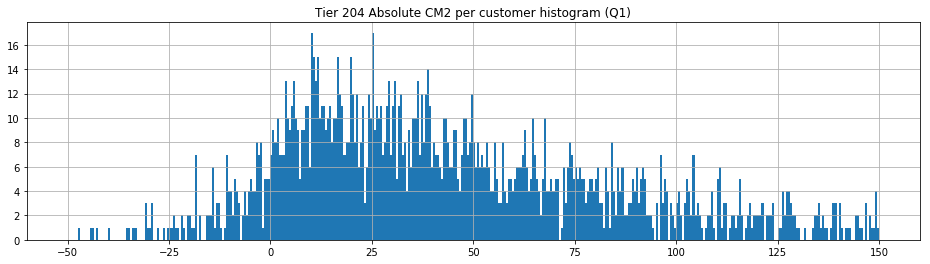

,CM2
count,1947.000000
mean,64.162049
std,85.410972
min,-171.630000
25%,15.945000
50%,41.340000
75%,84.180000
max,1202.130000


20.424  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  20.424  we keep eligible a  66.67  % from our customers
With CM2% threshold >= 7 and CM2 >=  20.424  we keep eligible a  60.4  % from our customers
With CM2% threshold >=  6.07  and CM2 >=  20.424  we keep eligible a  63.43  % from our customers


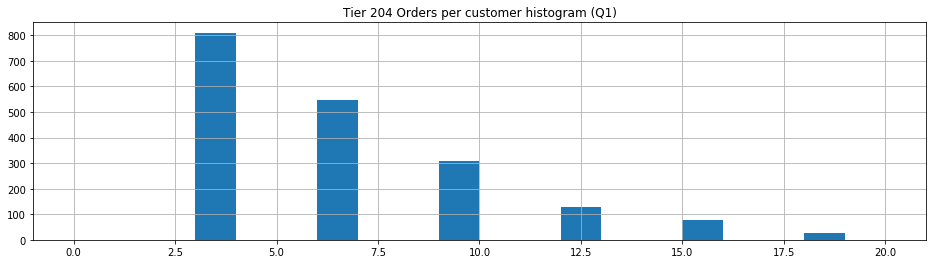

,ORDERS
count,1947.000000
mean,6.691834
std,5.074324
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,57.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  75.14  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  65.74  % from our customers
With CM2% threshold >=  6.07  and Orders >=  3.0  we keep eligible a  70.06  % from our customers
                                                                                                                    
                                                                                                                    


In [17]:
for tq in tiers:
    data_tier = sim[sim['TIER'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].fillna(0).describe()))
    perc_30_cm2_rel = data_tier['CM2%'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2%'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2%'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    perc_30_cm2_abs = data_tier['CM2'].fillna(0).quantile(.3)
    val1 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val2 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val3 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 20))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [18]:
(data['SALES'] / data['NET_SALES']).describe()

count    2.579230e+05
mean             -inf
std               NaN
min              -inf
25%      1.070030e+00
50%      1.084561e+00
75%      1.121140e+00
max      1.250179e+00
dtype: float64